# Intelligent Systems
## HW 3
### Reza Jahani / 810198377

# Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
from sklearn.datasets import load_iris

# Question 1

## Part 1) K-Means Clustering

In [ ]:
def Euclidian_Distance(x,y):
    d = x - y;
    dist = np.sqrt(np.sum(d**2))
    return dist

In [ ]:
x = np.array([[0,0],
              [0,1],
              [-1,2],
              [2,0],
              [3,0],
              [4,-1]])
n = len(x)

In [ ]:
Dist_Matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        Dist_Matrix[i][j] = Euclidian_Distance(x[i],x[j])
np.round(Dist_Matrix,2)

array([[0.  , 1.  , 2.24, 2.  , 3.  , 4.12],
       [1.  , 0.  , 1.41, 2.24, 3.16, 4.47],
       [2.24, 1.41, 0.  , 3.61, 4.47, 5.83],
       [2.  , 2.24, 3.61, 0.  , 1.  , 2.24],
       [3.  , 3.16, 4.47, 1.  , 0.  , 1.41],
       [4.12, 4.47, 5.83, 2.24, 1.41, 0.  ]])

In [ ]:
c1 = [4,-1]
c2 = [-1,2]
for i in range(n):
    if Euclidian_Distance(x[i],c1) > Euclidian_Distance(x[i],c2):
        print("c2")
    else:
        print("c1")

c2
c2
c2
c1
c1
c1


In [ ]:
c1 = [3,-1/3]
c2 = [-1/3,1]
for i in range(n):
    if Euclidian_Distance(x[i],c1) > Euclidian_Distance(x[i],c2):
        print("c2")
    else:
        print("c1")

c2
c2
c2
c1
c1
c1


In [ ]:
c1 = x[3:]
c2 = x[0:3]

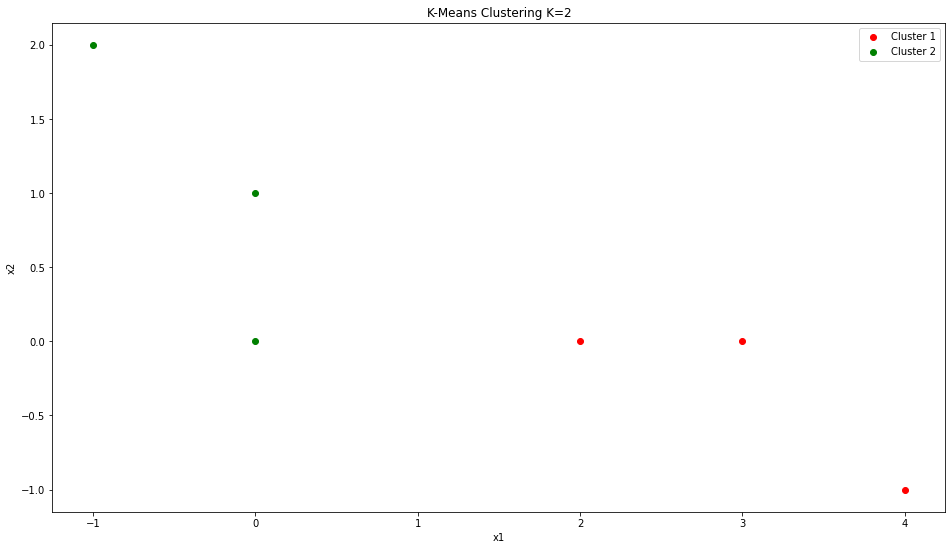

In [ ]:
plt.figure(figsize=(16,9))
plt.scatter(c1[:,0],c1[:,1],color='r',label="Cluster 1")
plt.scatter(c2[:,0],c2[:,1],color='g',label='Cluster 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('K-Means Clustering K=2')
plt.legend()
plt.show()

## Part 2) Sequential Clustering

# Question 2

## Part 1) Cluster Repeat Effect

In [69]:
data = load_iris()

In [70]:
X = data.data

In [106]:
def Euclidian_Distance(x,y):
    d = x - y;
    dist = np.sqrt(np.sum(d**2))
    return dist

In [107]:
def K_Means(X,K,num_iteration):

    # Initiating Values
    n, m = X.shape
    feature_vals = np.zeros((m,2))
    Clusters = np.zeros(n)
    J = [2]

    # Random Centroids
    for i in range(m):
        feature = X[:,i]
        feature_vals[i][1] = np.max(feature)    
        feature_vals[i][0] = np.min(feature)
    centroids = np.zeros((K,m))
    for i in range(K):
        for j in range(m):
            centroids[i][j] = np.random.uniform(feature_vals[j][0],feature_vals[j][1])

    # K-Means Algorithm    
    for i in range(num_iteration):
        
        # Categorizing the data points
        for p in range(n):
            data_distance = []

            for k in range(K):
                data_distance.append(Euclidian_Distance(X[p],centroids[k]))

            cluster = np.argmin(data_distance) + 1
            Clusters[p] = cluster

        # Update Centroids
        for k in range(K):
            index = np.where(Clusters == k+1)[0]
            cluster_members = X[index]
            temp = np.zeros(m)
            for l in range(len(cluster_members)):
                temp = temp + cluster_members[l]
            if len(cluster_members!=0):
                centroids[k] = temp/len(cluster_members)

        # Computing Cost Function
        j = 0
        for l in range(n):
            cluster_centroid = centroids[int(Clusters[l])-1]
            data_point = X[l]
            d = Euclidian_Distance(data_point,cluster_centroid)
            j = j + d**2
        J.append(j/n)

    return Clusters, centroids, J

In [108]:
def J_plot(X, num_iteration, K, color):
    plt.figure(figsize=(16,9))
    for i in range(len(K)):
        _,_,j = K_Means(X,K[i],num_iteration)
        plt.plot(range(num_iteration+1),j,color[i],label=f"K={K[i]}")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(f"Cost Function")
    plt.legend()
    plt.show()

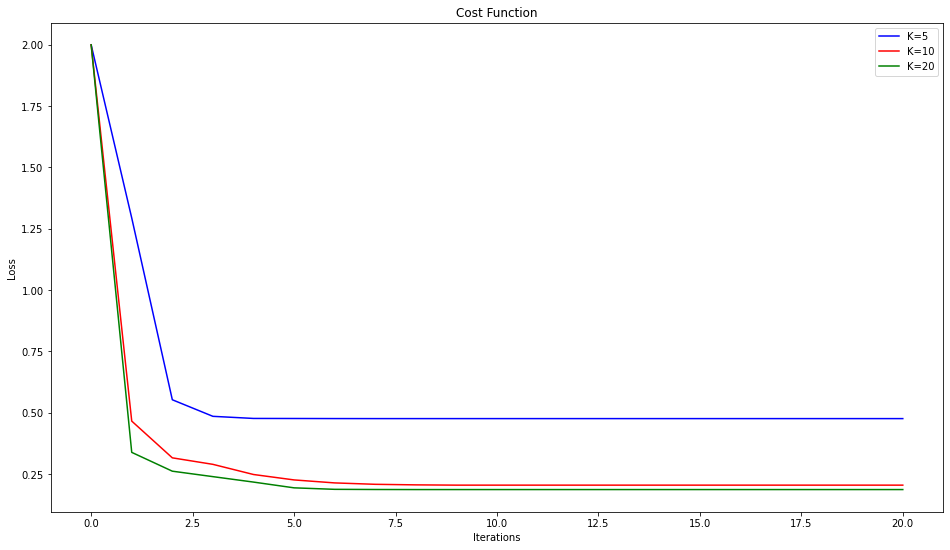

In [111]:
num_iteration = 20
K = [5,10,20]
color = ['b','r','g']
J_plot(X, num_iteration, K,color)

## Experiment Repeat Effect

Section 1

In [113]:
def Distance(x,y):
    d = x - y;
    dist = np.sqrt(np.sum(d**2,axis=1))
    return dist

In [126]:
def Inner_Distance(X,K,Clusters,centroids):
    distance = []
    for k in range(K):
        index = np.where(Clusters==k+1)[0]
        cluster_members = X[index]
        centre = centroids[k]
        if len(cluster_members != 0):
            distance.append(np.sum(Distance(cluster_members,centre))/len(cluster_members))
    inner_distance = sum(distance)/K
    return inner_distance

In [127]:
def Outer_Distance(K,centroids):
    distance = []
    for i in range(K):
        j = i + 1
        while j<K:
            distance.append(Euclidian_Distance(centroids[i],centroids[j]))
            j = j + 1
    outer_distance = sum(distance)/K
    return outer_distance

In [128]:
def K_Means_New(X,K,num_iteration):

    # Initiating Values
    n, m = X.shape
    feature_vals = np.zeros((m,2))
    Clusters = np.zeros(n)
    J = [2]
    Ratio_vals = []

    # Random Centroids
    for i in range(m):
        feature = X[:,i]
        feature_vals[i][1] = np.max(feature)    
        feature_vals[i][0] = np.min(feature)
    centroids = np.zeros((K,m))
    for i in range(K):
        for j in range(m):
            centroids[i][j] = np.random.uniform(feature_vals[j][0],feature_vals[j][1])

    # K-Means Algorithm    
    for i in range(num_iteration):
        
        # Categorizing the data points
        for p in range(n):
            data_distance = []

            for k in range(K):
                data_distance.append(Euclidian_Distance(X[p],centroids[k]))

            cluster = np.argmin(data_distance) + 1
            Clusters[p] = cluster

        # Update Centroids
        for k in range(K):
            index = np.where(Clusters == k+1)[0]
            cluster_members = X[index]
            temp = np.zeros(m)
            for l in range(len(cluster_members)):
                temp = temp + cluster_members[l]
            if len(cluster_members!=0):
                centroids[k] = temp/len(cluster_members)

        # Computing Cost Function
        j = 0
        for l in range(n):
            cluster_centroid = centroids[int(Clusters[l])-1]
            data_point = X[l]
            d = Euclidian_Distance(data_point,cluster_centroid)
            j = j + d**2
        J.append(j/n)

        # Ratio Calculation
        inner_distance = Inner_Distance(X,K,Clusters,centroids)
        outer_distance = Outer_Distance(K,centroids)
        Ratio = outer_distance / (outer_distance + inner_distance)
        Ratio_vals.append(Ratio)

    return Clusters, centroids, J, Ratio_vals

In [145]:
_, _, J1, Ratio_vals1 = K_Means_New(X,5,20)
_, _, J2, Ratio_vals2 = K_Means_New(X,10,20)
_, _, J3, Ratio_vals3 = K_Means_New(X,20,20)

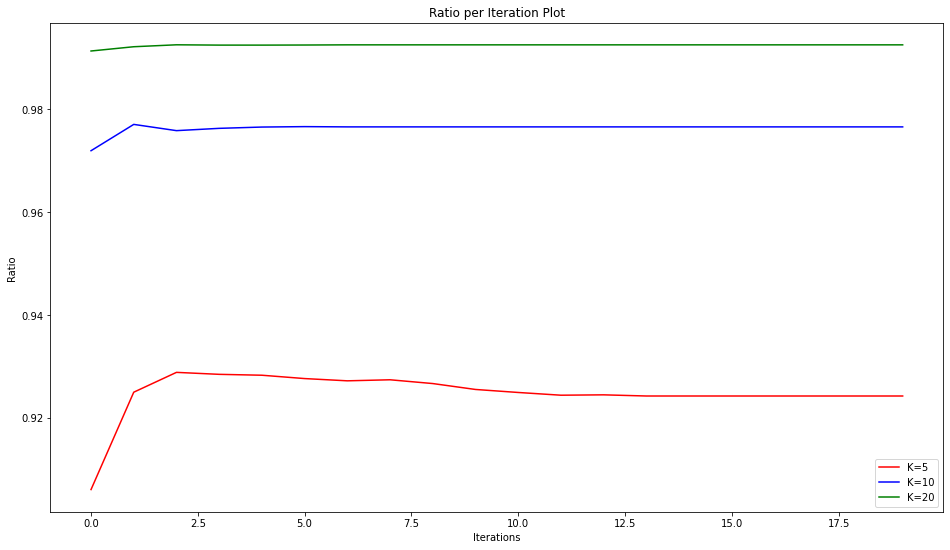

In [146]:
plt.figure(figsize=(16,9))
plt.plot(range(num_iteration),Ratio_vals1,'r',label='K=5')
plt.plot(range(num_iteration),Ratio_vals2,'b',label='K=10')
plt.plot(range(num_iteration),Ratio_vals3,'g',label='K=20')
plt.xlabel('Iterations')
plt.ylabel('Ratio')
plt.title('Ratio per Iteration Plot')
plt.legend()
plt.show()

Section 2

In [155]:
Num_Experiment = 50
num_iteration = 20
K = 5
Ratio_Values = []
J_Values = []
for i in range(Num_Experiment):
    _, _, J, Ratio_vals = K_Means_New(X,K,num_iteration)
    Ratio_Values.append(Ratio_vals[-1])
    J_Values.append(J[-1])
Ratio_Mean1 = np.mean(Ratio_Values)
Ratio_Variance1 = np.var(Ratio_Values)
J_Mean1 = np.mean(J_Values)
J_Variance1 = np.var(J_Values)

In [156]:
Num_Experiment = 50
num_iteration = 20
K = 10
Ratio_Values = []
J_Values = []
for i in range(Num_Experiment):
    _, _, J, Ratio_vals = K_Means_New(X,K,num_iteration)
    Ratio_Values.append(Ratio_vals[-1])
    J_Values.append(J[-1])
Ratio_Mean2 = np.mean(Ratio_Values)
Ratio_Variance2 = np.var(Ratio_Values)
J_Mean2 = np.mean(J_Values)
J_Variance2 = np.var(J_Values)

In [157]:
Num_Experiment = 50
num_iteration = 20
K = 20
Ratio_Values = []
J_Values = []
for i in range(Num_Experiment):
    _, _, J, Ratio_vals = K_Means_New(X,K,num_iteration)
    Ratio_Values.append(Ratio_vals[-1])
    J_Values.append(J[-1])
Ratio_Mean3 = np.mean(Ratio_Values)
Ratio_Variance3 = np.var(Ratio_Values)
J_Mean3 = np.mean(J_Values)
J_Variance3 = np.var(J_Values)

In [158]:
J_Mean = [J_Mean1, J_Mean2, J_Mean3]
J_Var = [J_Variance1, J_Variance2, J_Variance3]
Ratio_Mean = [Ratio_Mean1, Ratio_Mean2, Ratio_Mean3]
Ratio_Var = [Ratio_Variance1, Ratio_Variance2, Ratio_Variance3]

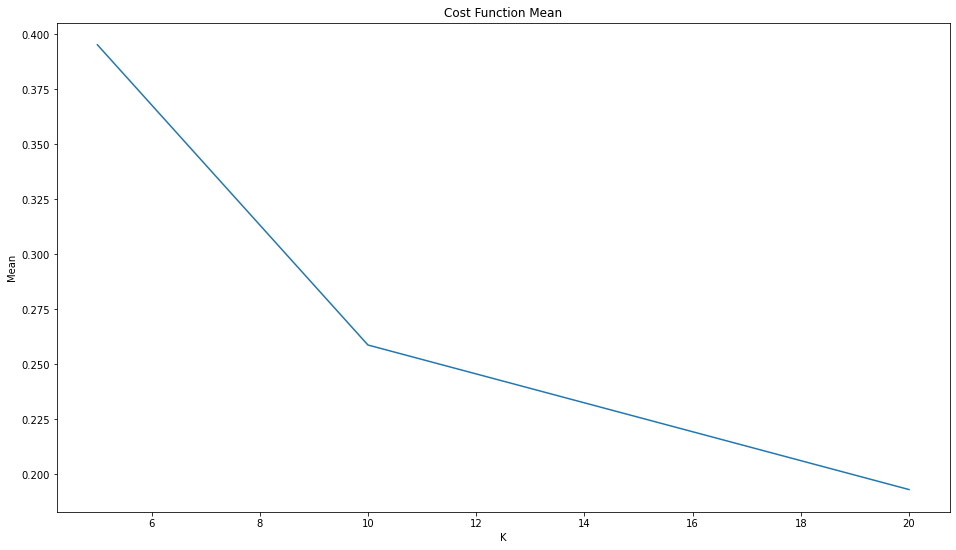

In [160]:
plt.figure(figsize=(16,9))
plt.plot([5,10,20],J_Mean)
plt.xlabel("K")
plt.ylabel("Mean")
plt.title("Cost Function Mean")
plt.show()

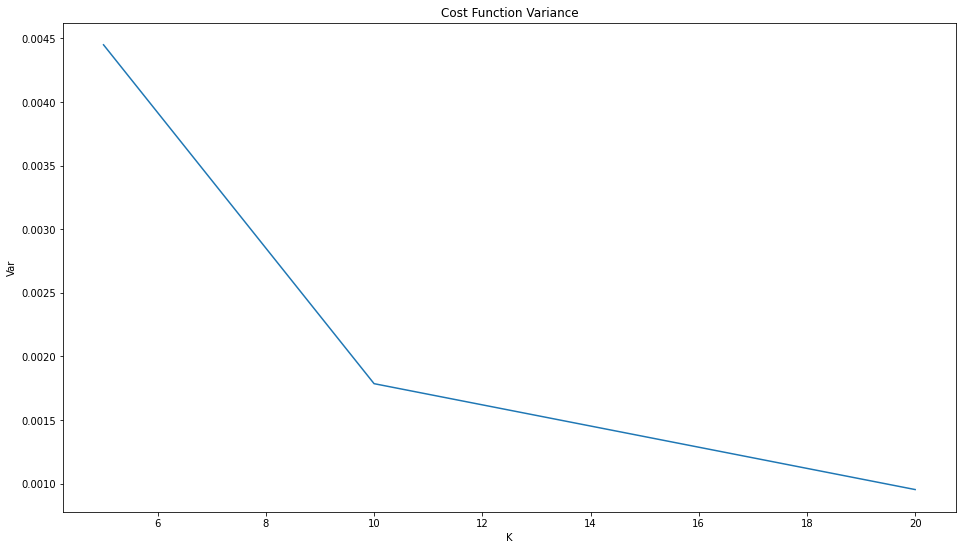

In [161]:
plt.figure(figsize=(16,9))
plt.plot([5,10,20],J_Var)
plt.xlabel("K")
plt.ylabel("Var")
plt.title("Cost Function Variance")
plt.show()

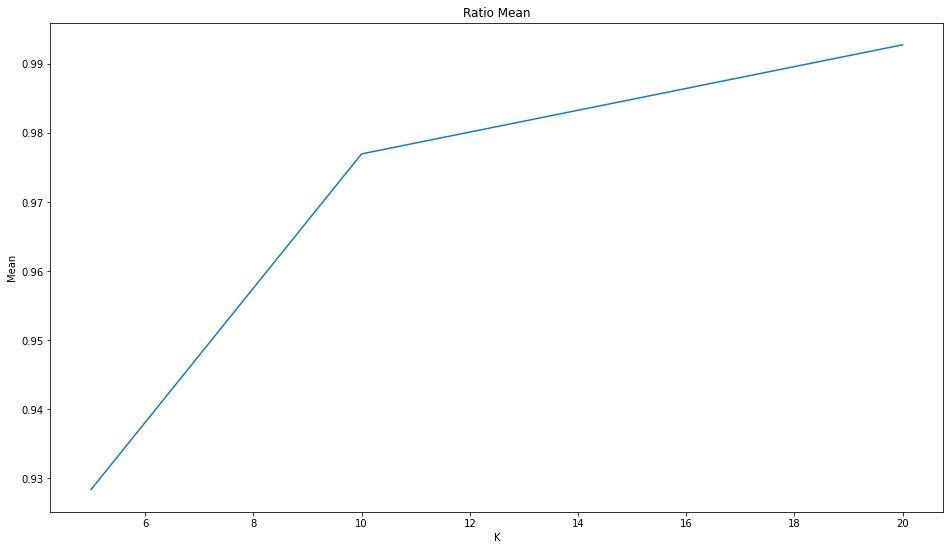

In [162]:
plt.figure(figsize=(16,9))
plt.plot([5,10,20],Ratio_Mean)
plt.xlabel("K")
plt.ylabel("Mean")
plt.title("Ratio Mean")
plt.show()

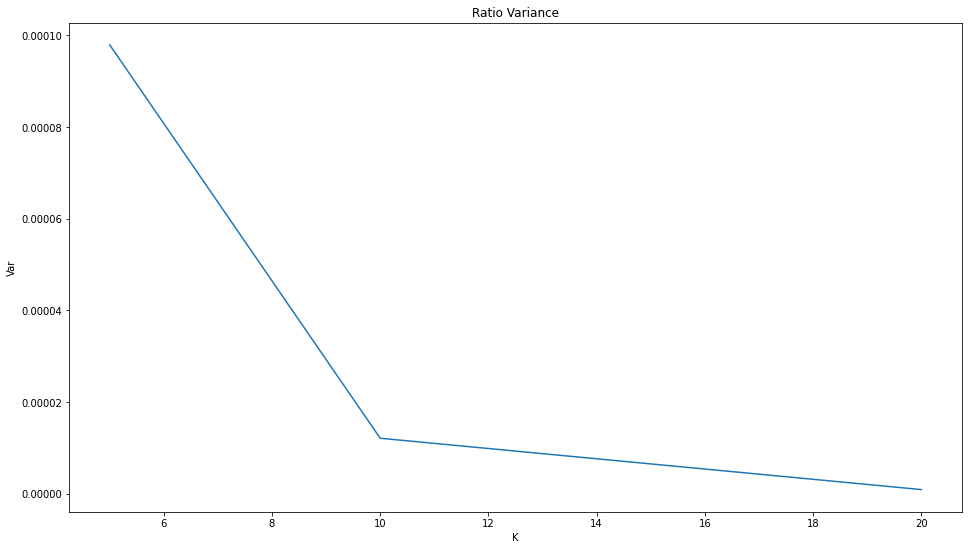

In [163]:
plt.figure(figsize=(16,9))
plt.plot([5,10,20],Ratio_Var)
plt.xlabel("K")
plt.ylabel("Var")
plt.title("Ratio Variance")
plt.show()